In [ ]:
# подключение библиотек
import pandas as pd
import random
import matplotlib.pyplot as plt
import pandas.plotting 
import seaborn as sb
import math as math
%matplotlib inline

In [ ]:
#url = "https://raw.githubusercontent.com/nazgull08/ibm7/master/datasets/BankChurners.csv"
my_file = open("tested.csv","r")
dataset = pd.read_csv(my_file)

1. Просмотр данных датасета

In [ ]:
#ds1 = dataset.drop(columns=['CLIENTNUM','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'])
#ds1
dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


2. Вывод всех полей таблицы и вывод цифровых полей

In [ ]:
# All columns
cols = dataset.columns
# Find numerical columns
num_cols = dataset._get_numeric_data().columns
cols,num_cols


(Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
        'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
       dtype='object'),
 Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object'))

Вывод буквеных полей

In [ ]:
categorical = list(set(cols) - set(num_cols))
categorical

['Ticket', 'Name', 'Sex', 'Cabin', 'Embarked']

3. График показывающий колчество мужчин и женщин на корабле и их процентное соотношение

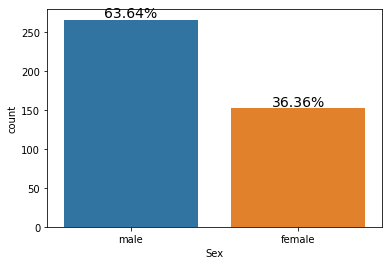

In [ ]:
sex_plot = sb.countplot(x=dataset["Sex"])
for p in sex_plot.patches:
    height = p.get_height()
    sex_plot.text(p.get_x()+p.get_width()/2, height + 3, '{:1.2f}%'.format(height/len(dataset)*100), ha="center", fontsize=14) 

4. График, показывающий количество людей, вошедших на корабль в каждом из портов, и их процентное соотношение

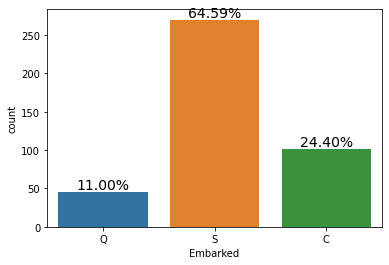

In [ ]:
emb_plot = sb.countplot(x=dataset["Embarked"])
for p in emb_plot.patches:
    height = p.get_height()
    emb_plot.text(p.get_x()+p.get_width()/2, height + 3, '{:1.2f}%'.format(height/len(dataset)*100), ha="center", fontsize=14) 

5. График, показывающий количество людей в каждом классе пассажиров и их процентное соотношение

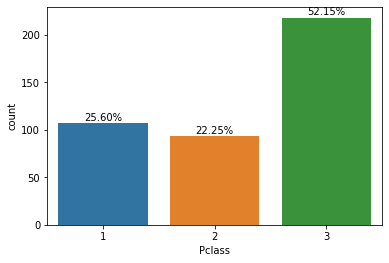

In [ ]:
age_plot = sb.countplot(x=dataset["Pclass"])
for p in age_plot.patches:
    height = p.get_height()
    age_plot.text(p.get_x()+p.get_width()/2, height + 3, '{:1.2f}%'.format(height/len(dataset)*100), ha="center", fontsize=10) 

6. График, показывающий число людей в каждой возрастной категории (10 лет) на корабле

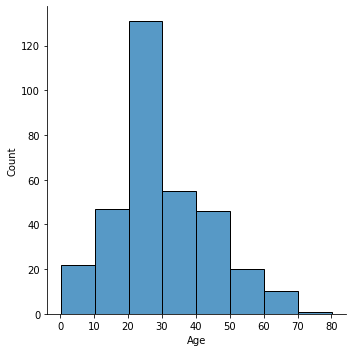

In [ ]:
sb.displot(dataset, x="Age", binwidth= 10)

7. Тепловая карта, отображающая зависимость между числовыми параметрами

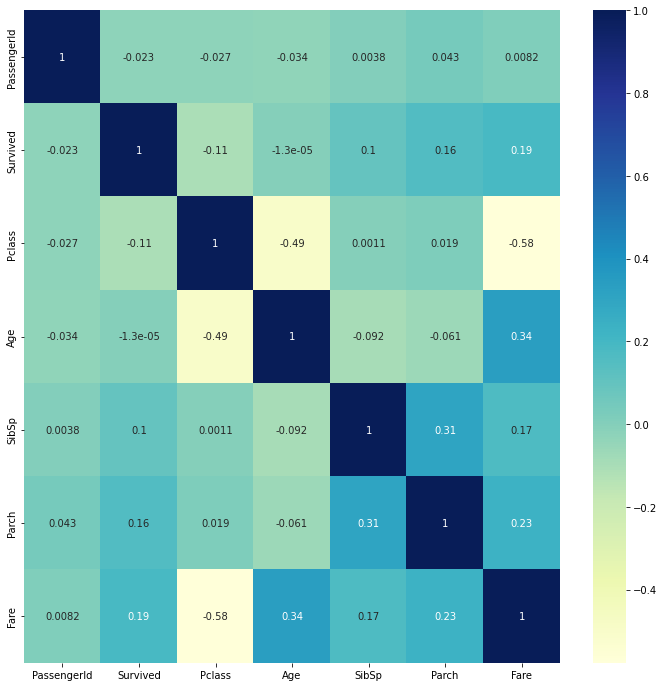

In [ ]:
plt.figure(figsize=(12, 12))

# plotting correlation heatmap
dataplot = sb.heatmap(dataset.corr(), cmap="YlGnBu", annot=True)


8. Диаграмма рассеивания возраста пассажира и класса пассажира

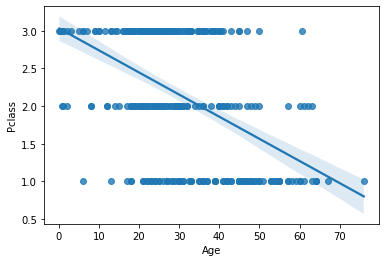

In [ ]:
sb.regplot(x=dataset["Age"],y=dataset["Pclass"])

9. График показывает распределение возроста по трём группам. 

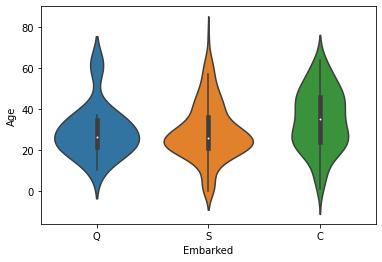

In [ ]:
sb.violinplot(x=dataset["Embarked"], y=dataset["Age"])

10. График показывает прямоугольную диаграмму распределения возраста для двух групп. 

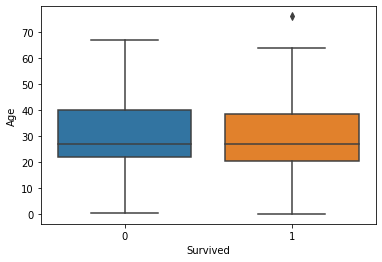

In [ ]:
sb.boxplot( x=dataset["Survived"], y=dataset["Age"] )